## Estadística Inferencial

Se llama estadística inferencial a la rama de la Estadística encargada de hacer deducciones, es decir, inferir propiedades, conclusiones y tendencias, a partir de una muestra del conjunto. Su papel es interpretar, hacer proyecciones y comparaciones. (hacemos suposiciones en base a los datos)

### Distribución

Una distribución es una función que muestra los posibles valores para una variable y con que frecuencia ocurren. (es el concepto de un histograma)

Un ejemplo de una distribución son los posibles valores que aparecen al lanzar un dado de 6 caras, estos serían los numeros del 1 al 6. Como solo hay 6 posibles valores y son independientes entre ellos, podemos decir que la probabilidad de que salga un número es de 1/6.

Esto lo podemos representar en una gráfica.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from scipy import stats

In [2]:
probabilidades = np.ones(6)/6

probabilidades

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

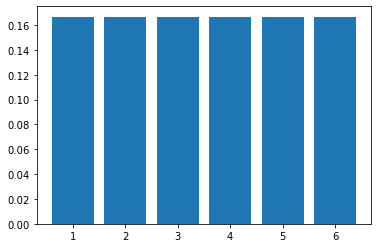

In [3]:
plt.bar(range(1, 7), probabilidades) #Es la distribución de la probabilidad al tirar un dado
plt.show()

**Esta distribución en particular se le conoce como `Distribución Uniforme` porque todos los valores son el mismo.**

Supongamos que ahora tenemos 2 dados, queremos ver cuales son los posibles resultados:

- El menor valor de lanzar 2 dados sería: 2.
- El mayor valor de lanzar 2 dados sería: 12.

In [4]:
# Posibles resultados

resultados = list()

for i in range(1, 7):
    for j in range(1, 7):
        resultados.append((i, j))
        
resultados #La probabilidad de cada combinación es 1/36

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

In [5]:
#Queremos ver cuántas veces aparece cada resultado
resultados_suma = [sum(res) for res in resultados]

conteo = Counter(resultados_suma)

for valor, cont in conteo.items():
    print(f"Valor: {valor}\t Conteo: {cont}\t Probabilidad: {cont/len(resultados)}")

Valor: 2	 Conteo: 1	 Probabilidad: 0.027777777777777776
Valor: 3	 Conteo: 2	 Probabilidad: 0.05555555555555555
Valor: 4	 Conteo: 3	 Probabilidad: 0.08333333333333333
Valor: 5	 Conteo: 4	 Probabilidad: 0.1111111111111111
Valor: 6	 Conteo: 5	 Probabilidad: 0.1388888888888889
Valor: 7	 Conteo: 6	 Probabilidad: 0.16666666666666666
Valor: 8	 Conteo: 5	 Probabilidad: 0.1388888888888889
Valor: 9	 Conteo: 4	 Probabilidad: 0.1111111111111111
Valor: 10	 Conteo: 3	 Probabilidad: 0.08333333333333333
Valor: 11	 Conteo: 2	 Probabilidad: 0.05555555555555555
Valor: 12	 Conteo: 1	 Probabilidad: 0.027777777777777776


**Podemos calcular la probabilidad de que suceda diviendo entre el total de posibilidades, en este caso son 36.**

Ahora con estos valores podemos mostrar una distribución de probabilidades.

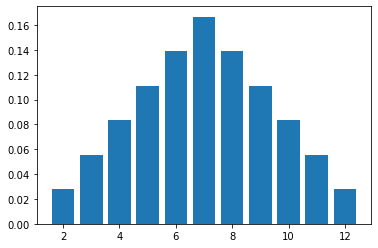

In [6]:
probabilidad = [c/36 for c in conteo.values()]

plt.bar(conteo.keys(), probabilidad)

plt.show() #Es una distribución normal

### Distribución Normal

La distribución normal (distribución gaussiana o distribución de campana) es una distribución que tiene la característica de:

$$media = mediana = moda$$

Es muy difícil encontrar una distribución que sea 100% exacta normal, pero sí que se aproxime.

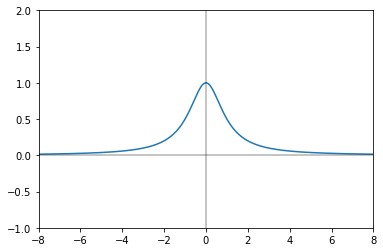

In [7]:
x = np.linspace(-10, 10, 1_000)

y = 1/(x**2 + 1)

# Curva
plt.plot(x, y)

# Eje X
plt.plot(x, np.zeros(len(x)), color = "black", alpha = 0.3)

# Eje Y
plt.plot(np.zeros(len(x)), x, color = "black", alpha = 0.3)

plt.ylim(-1, 2)
plt.xlim(-8, 8)
plt.show()

In [8]:
# Necesito que la media, la mediana y la moda sean lo suficientemente cercanos al mismo valor
print(f"Media: {np.mean(x)}")
print(f"Mediana: {np.median(x)}")
print(f"Moda: {stats.mode(y)[0][0]}")

Media: 0.0
Mediana: 0.0
Moda: 0.009900990099009901


**El ejemplo de los 2 dados sigue una distribución normal.**

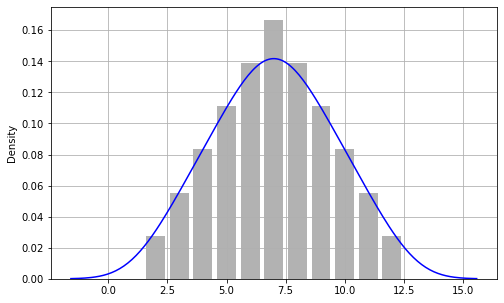

In [9]:
plt.figure(figsize = (8, 5))

plt.bar(conteo.keys(), probabilidad, color = "black", alpha = 0.3)
sns.kdeplot(resultados_suma, color = "blue")

plt.grid()
plt.show()

In [10]:
print(f"Media: {np.mean(resultados_suma)}")
print(f"Mediana: {np.median(resultados_suma)}")
print(f"Moda: {stats.mode(resultados_suma)[0][0]}")

print(f"std: {np.std(resultados_suma)}")

Media: 7.0
Mediana: 7.0
Moda: 7
std: 2.41522945769824


### Estandarización

La estandarización es el proceso de transformación de una variable con **`media != 0`** y con **`std != 1`** a **`media == 0`** y **`std == 1`**. (para desplazar la función que no está en los ejes de coordenadas para que sí lo estén. std == 1 significa que la mayoría de los puntos de la función está concentrada entre -1 y 1)

Para esto, debemos transformar cada valor, siguiendo la siguiente formula: **`(x - mean) / std`**.

**Todas las distribuciones pueden ser estandarizadas.**

In [11]:
print(resultados_suma)

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]


In [15]:
media = np.mean(resultados_suma)

std = np.std(resultados_suma)

resultados_estandar = [(x - media) / std for x in resultados_suma]

print(resultados_estandar)

[-2.0701966780270626, -1.65615734242165, -1.2421180068162376, -0.828078671210825, -0.4140393356054125, 0.0, -1.65615734242165, -1.2421180068162376, -0.828078671210825, -0.4140393356054125, 0.0, 0.4140393356054125, -1.2421180068162376, -0.828078671210825, -0.4140393356054125, 0.0, 0.4140393356054125, 0.828078671210825, -0.828078671210825, -0.4140393356054125, 0.0, 0.4140393356054125, 0.828078671210825, 1.2421180068162376, -0.4140393356054125, 0.0, 0.4140393356054125, 0.828078671210825, 1.2421180068162376, 1.65615734242165, 0.0, 0.4140393356054125, 0.828078671210825, 1.2421180068162376, 1.65615734242165, 2.0701966780270626]


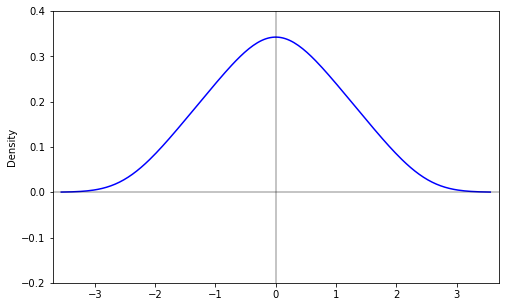

In [13]:
plt.figure(figsize = (8, 5))

# Curva
sns.kdeplot(resultados_estandar, color = "blue")

# Eje X
plt.plot(x, np.zeros(len(x)), color = "black", alpha = 0.3)

# Eje Y
plt.plot(np.zeros(len(x)), x, color = "black", alpha = 0.3)

plt.xlim(-3.7, 3.7)
plt.ylim(-0.2, 0.4)
plt.show()

Cuando menor sea la desviación estándar, los valores serán más cercanos a la media.
También funciona para la varianza.

**Ahora la distribución esta centrada en 0, tiene media = mediana = moda = 0 y desviación estandar = 1.**

In [14]:
print(f"Media: {np.mean(resultados_estandar)}")
print(f"Mediana: {np.median(resultados_estandar)}")
print(f"Moda: {stats.mode(resultados_estandar)[0][0]}")

print(f"std: {np.std(resultados_estandar)}")

Media: 2.4671622769447922e-17
Mediana: 0.0
Moda: 0.0
std: 1.0


### Teorema de limite central

Por lo general, trabajaremos con muestras de una población, estas muestras tendrán: media, mediana, moda, std, min, max...

El Teorema de limite central establece que, si tenemos suficientes muestras diferentes de una población, la distribución de sus medias seguirá una **distribución normal**. A la distribución de medias se le conoce como **distribución de medias muestrales**.

Además de que la media de las medias muestrales se aproximará más aún a la media de la población. Todo esto se puede inferir sin saber cual es la población.

In [16]:
# Supongamos que tenemos la siguiente lista de medias de diferentes muestras de población:

medias_muestrales = sorted(np.random.random(30)*28000)

print(medias_muestrales)

[76.92615773087752, 212.33784196657092, 1514.2526272474029, 2137.343209674144, 2706.4592184702196, 2919.329404617822, 4000.8770700013906, 6679.89625320522, 6846.054874466205, 7083.210727002061, 8595.672360940325, 10180.426543885891, 10770.562720677555, 11823.314263886394, 11824.50249599722, 12496.803800396867, 13081.337206996068, 14757.562766623849, 15346.676036569876, 16418.509059308708, 16779.204214401772, 16825.877006150713, 17934.2498771853, 19546.283906885896, 20543.942551601416, 21112.987705802898, 21958.295349338518, 22117.51768320722, 25136.061122146697, 25451.045123837288]


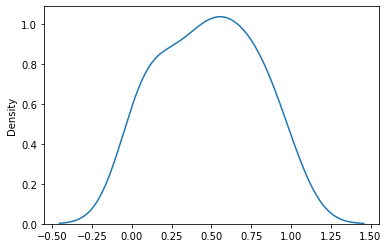

In [22]:
sns.kdeplot(medias_muestrales/max(medias_muestrales))
plt.show()

In [23]:
print(f"Media: {np.mean(medias_muestrales/max(medias_muestrales))}")
print(f"Mediana: {np.median(medias_muestrales/max(medias_muestrales))}")
print(f"Moda: {stats.mode(medias_muestrales/max(medias_muestrales))[0][0]}")

print(f"std: {np.std(medias_muestrales)}")

Media: 0.4805009216649774
Mediana: 0.4778056495922618
Moda: 0.003022514688751582
std: 7536.9843328503


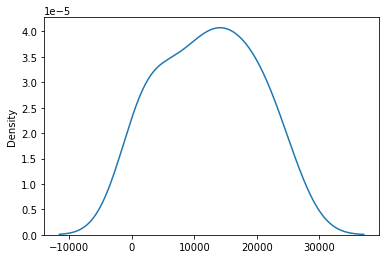

In [17]:
sns.kdeplot(medias_muestrales)
plt.show()

In [18]:
print(f"Media: {np.mean(medias_muestrales)}")
print(f"Mediana: {np.median(medias_muestrales)}")
print(f"Moda: {stats.mode(medias_muestrales)[0][0]}")

print(f"std: {np.std(medias_muestrales)}")

Media: 12229.250639340748
Mediana: 12160.653148197043
Moda: 76.92615773087752
std: 7536.9843328503


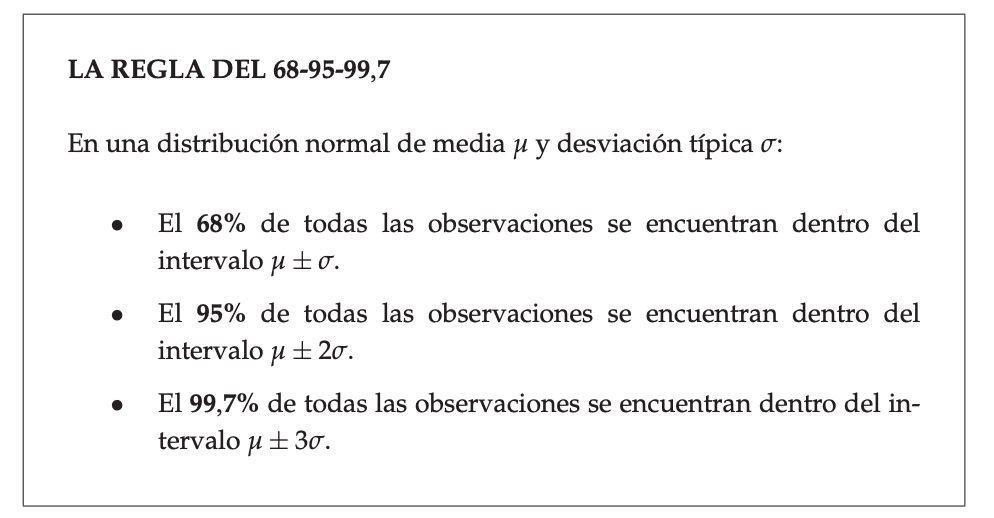

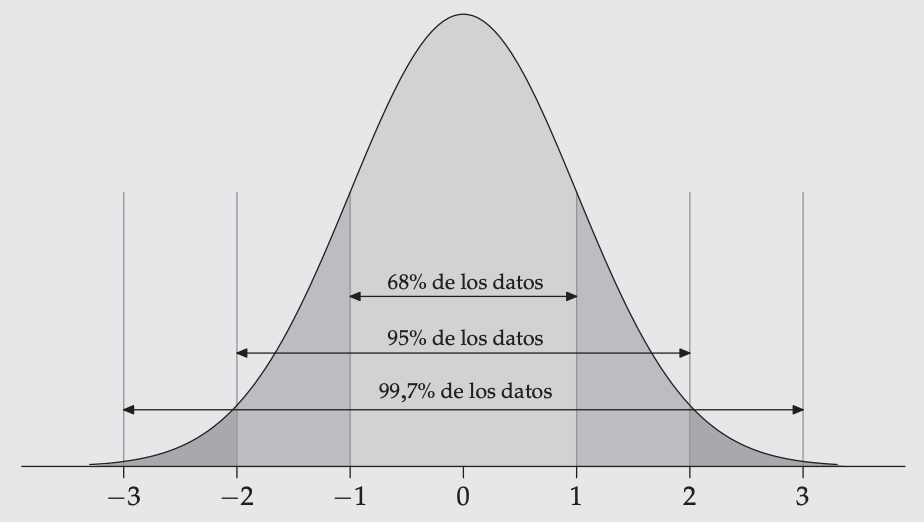

## Correlación entre 2 variables

El método que se va a utilizar para calcular la correlación entre 2 variables es el coeficiente de correlación lineal de pearson. El cual mide únicamente la relación entre ambas variables sin considerar dependencias y siempre buscando una correlación lineal.

Para poder calcular la correlación utilizamos el cálculo de la covarianza entre ambas variables.

NOTA: x e y son dos variables (columnas) diferentes, no las coordenadas de un punto

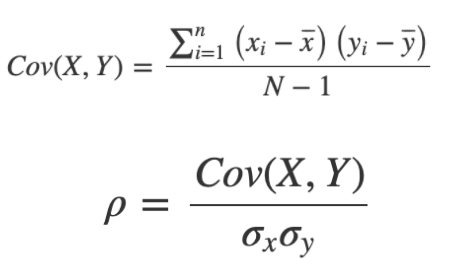

Donde el valor de **`p`** puede tomar valores desde -1 hasta +1 y de acuerdo a su valor se pueden asignar las siguientes categorías:

- 0: asociación nula.
- 土 0.1: asociación pequeña.
- 土 0.3: asociación mediana.
- 土 0.5: asociación moderada.
- 土 0.7: asociación alta.
- 土 0.9: asociación muy alta.

In [24]:
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
iris.corr() #Por defecto, utiliza pearson

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [26]:
iris.corr(method = "kendall")

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.076997,0.718516,0.655309
sepal_width,-0.076997,1.000000,-0.185994,-0.157126
petal_length,0.718516,-0.185994,1.000000,0.806891
petal_width,0.655309,-0.157126,0.806891,1.000000


## Coeficiente de asimetría (Skewness)

Es una medida de la asimetría (falta de simetría) de un conjunto de datos numéricos $x_1, x_2, x_3... x_n$. 

El coeficiente de asimetría se define con la siguiente ecuación (se eleva a 3 porque es grande y así se penaliza más la resta. Se mantiene el signo. La s es la desviación estándar)

$$sk = \frac{1}{s^3}(\frac{1}{n}\sum_{n}^{i=1}(x_i - \bar{x})^3) $$

El coeficiente de asimetría **no posee unidad de medición, es un número que puede ser positivo, negativo o cero.**

Su signo es positivo cuando la gráfica de frecuencias de los datos presenta una cola más alargada hacia la derecha de la media. (Los datos están concentrados a la izquierda, los datos de la parte derecha pueden considerarse outliers) 

En cambio, el signo del coeficiente de asimetría es negativo cuando la gráfica de frecuencias presenta una cola más alargada hacia la izquierda de la media. (Los datos están concentrados a la derecha, los datos de la parte izquierda pueden considerarse outliers)

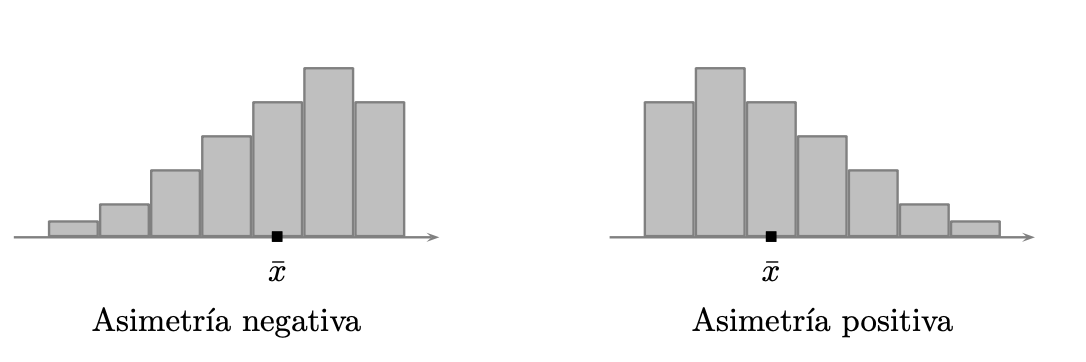

Por consiguiente, en el caso simétrico, cuando por cada dato $x_i$, a la izquierda de $\bar{x}$ hay otro dato a la derecha y a la misma distancia de este punto central, el coeficiente de asimetría es cero. (Si el coeficiente de simetría es 0, tenemos una distribución normal y hay la misma cantidad de datos a la derecha y a la izquierda del eje)

Columna: sepal_length	 Skewness: 0.3117530585022963


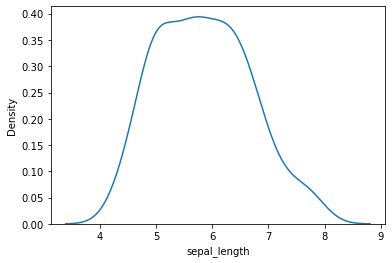

Columna: sepal_width	 Skewness: 0.31576710633893473


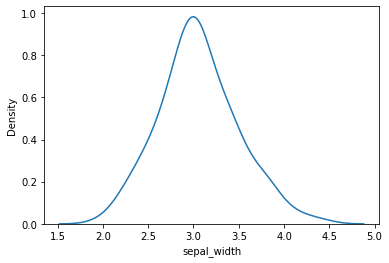

Columna: petal_length	 Skewness: -0.2721276664567214


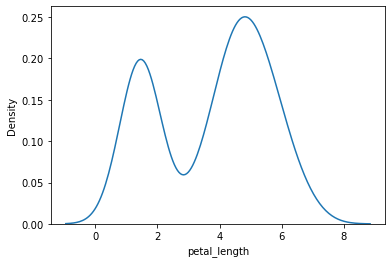

Columna: petal_width	 Skewness: -0.10193420656560036


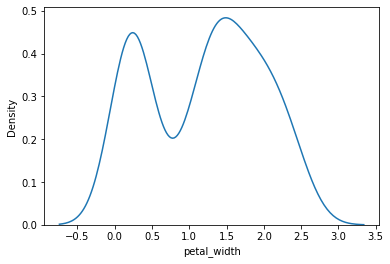

In [29]:
from scipy.stats import skew 

for col in iris.columns[:-1]:
    
    print(f"Columna: {col}\t Skewness: {skew(iris.loc[:, col])}")

    sns.kdeplot(iris.loc[:, col])

    plt.show()

#La primera tiene asimetría positiva
#La segunda es una distribución normal

# Curtosis (Kurtosis)

La curtosis es un número positivo que no tiene unidad de medición. Cuando una observación $x_i$ dista mucho de la media $\bar{x}$, al elevar esta distancia a la cuarta potencia  hace que se magnifiquen las distancias grandes, por lo tanto, una curtosis grande puede indicar un mayor número de datos alejados de la media, hacia uno u otro lado.

La curtosis de una distribución normal estándar es igual a 3, la siguiente ecuación para calcular la kurtosis (llamada excess kurtosis) es:

$$k3 = \frac{1}{s^4}(\frac{1}{n}\sum_{n}^{i=1}(x_i - \bar{x})^4)-3$$

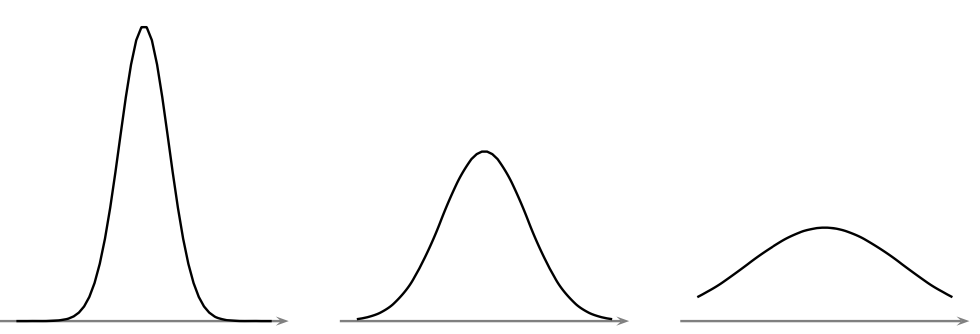

1. Leptocúrtica ($k_3 > 0$): Decaimiento rápido, cola ligera. (las colas tienen pocos valores)
2. Mesocúrtica ($k_3=0$): Curva normal. (las colas tienen más valores)
3. Paticúrtica ($k_3<0$ ): Decaimiento lento. (las colas tienen más valores)

Columna: sepal_length	 Kurtosis: -0.5735679489249765


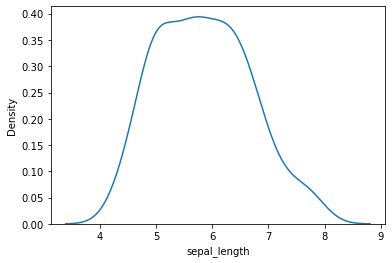

Columna: sepal_width	 Kurtosis: 0.18097631752246768


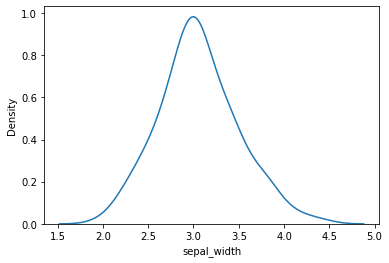

Columna: petal_length	 Kurtosis: -1.3955358863990055


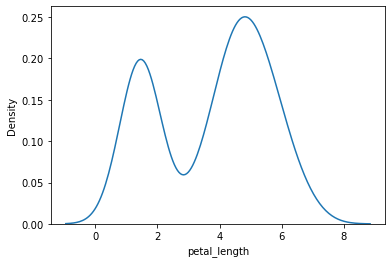

Columna: petal_width	 Kurtosis: -1.336067405231553


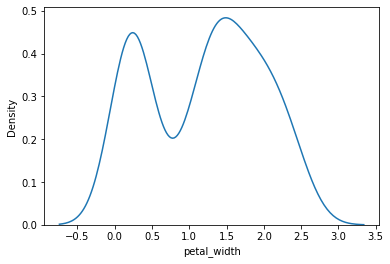

In [30]:
from scipy.stats import kurtosis

for col in iris.columns[:-1]:
    
    print(f"Columna: {col}\t Kurtosis: {kurtosis(iris.loc[:, col])}")

    sns.kdeplot(iris.loc[:, col])

    plt.show()

In [ ]:
################################################################################################################################

**Ejercicio:**


Utiliza alguno de los siguientes datasets:

_https://www.kaggle.com/kamilpytlak/personal-key-indicators-of-heart-disease_

_https://www.kaggle.com/pralabhpoudel/world-energy-consumption_

_https://www.kaggle.com/nguyenngocphung/human-development-indices-19902019_

_https://www.kaggle.com/shashwatwork/eeg-psychiatric-disorders-dataset_

_https://www.kaggle.com/gsutters/the-human-freedom-index_

1. Gráfica la distribución de cada atributo
2. En cada gráfica agrega una recta que indique la media, y 2 rectas que indiquen 1 desviación estandar hacia derecha y hacia la izquierda, 2 rectas que indiquen 2 desviaciones estandar hacia la derecha y hacia la izquierda. 
3. Indica si el skewness y la curtosis son positivas o negativas. (ambos son 0 cuando la distribución es normal)
   Si |skew| <= 0.1, |kurt| <= 0.1, considerar que la distribución es normal
4. Indica si cumplen con la regla del 68-95-99.7 (sólo para distribución normal)
5. Define una función que realice los pasos anteriores y pruebala con otro dataset.

In [56]:
import pandas as pd

In [57]:
data = pd.read_csv("heart_2020_cleaned.csv")
#data.dropna(inplace=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [58]:
data.shape

(319795, 18)

In [59]:
cuantitativos = list()

for columna in data.columns:
    if data[columna].dtype == "float64":
        cuantitativos.append(columna)
cuantitativos

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

Columna: BMI	 Kurtosis: 3.889963770419137	 Skewness: 1.3324243931174096
Kurtosis es positiva
Skewness es positiva
Media: 28.325398520926328
std: 6.356090262690802


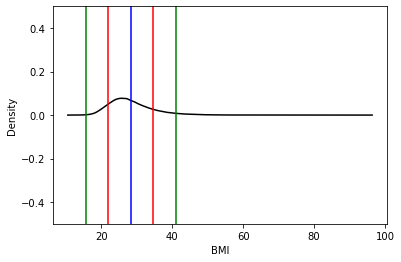

No es distribución normal
Columna: PhysicalHealth	 Kurtosis: 5.52834443931836	 Skewness: 2.603961048282941
Kurtosis es positiva
Skewness es positiva
Media: 3.3717100017198516
std: 7.950837751397715


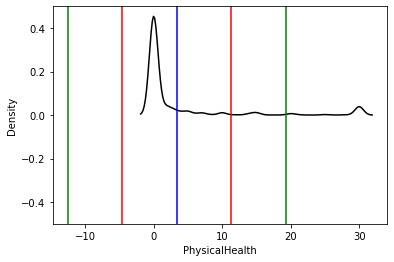

No es distribución normal
Columna: MentalHealth	 Kurtosis: 4.403849003140337	 Skewness: 2.3311006150318807
Kurtosis es positiva
Skewness es positiva
Media: 3.898366140808956
std: 7.955222780913971


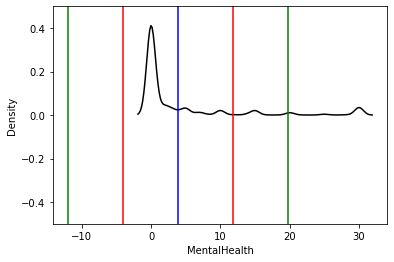

No es distribución normal
Columna: SleepTime	 Kurtosis: 7.854726994730125	 Skewness: 0.6790314357818186
Kurtosis es positiva
Skewness es positiva
Media: 7.097074688472302
std: 1.4360048157657577


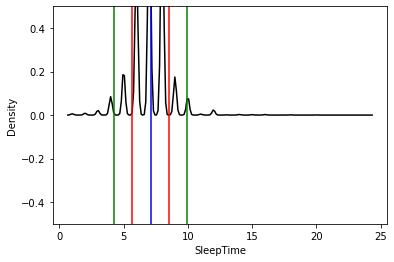

No es distribución normal


In [78]:
from scipy.stats import kurtosis

for col in cuantitativos:
    # Lista de valores que tomará y en las rectas que representan la media y la desviación
    y = np.linspace(-10, 10, 100)
    
    # Mostrar el nombre, la Kurtosis y el Skewness de la columna
    print(f"Columna: {col}\t Kurtosis: {kurtosis(data.loc[:, col])}\t Skewness: {skew(data.loc[:, col])}")
    
    if kurtosis(data.loc[:, col]) >= 0:
        print("Kurtosis es positiva")
    else:
        print("Kurtosis es negativa")
    
    if skew(data.loc[:, col]) >= 0:
        print("Skewness es positiva")
    else:
        print("Skewness es negativa")
    
    # Mostrar la media de los datos de la columna
    print(f"Media: {np.mean(data.loc[:, col])}")
    # Mostrar la desviación estándar de los datos de la columna
    print(f"std: {np.std(data.loc[:, col])}")
    
    # Mostrar la distribución de los datos de la columna
    sns.kdeplot(data.loc[:, col],color = "black")
    
    # Recta que indica la media
    plt.plot([np.mean(data.loc[:, col])]*100, y, color = "blue")
    
    # Rectas que muestran la desviación estandar hacia derecha (positivo) y hacia la izquierda (negativo)
    plt.plot([np.std(data.loc[:, col]) + np.mean(data.loc[:, col])]*100, y, color = "red")
    plt.plot([-np.std(data.loc[:, col])+ np.mean(data.loc[:, col])]*100, y, color = "red")
    
    # Rectas que muestran 2 desviaciones estandar hacia la derecha (positivo) y hacia la izquierda (negativo)
    plt.plot([2*np.std(data.loc[:, col]) + np.mean(data.loc[:, col])]*100, y, color = "green")
    plt.plot([-2*np.std(data.loc[:, col])+ np.mean(data.loc[:, col])]*100, y, color = "green")
    
    # Rango de visualización del eje y
    plt.ylim(-0.5,0.5)
    
    plt.show()
    
    # Comprobar la regla del 68-95-99.7
    if (abs(kurtosis(data.loc[:, col])) <= 0.1) and (abs(skew(data.loc[:, col])) <= 0.1):
        print("Es distribución normal")
        total = len(data.loc[:, col])
        
        # Para el 68
        num_valores_68 = len(data.loc[:, col].between(-np.std(data.loc[:, col])+ np.mean(data.loc[:, col]), np.std(data.loc[:, col]) + np.mean(data.loc[:, col])))
        if ((num_valores_68/total)*100).between(66, 70) == True:
            print("Cumple la condición del 68")
        else:
            print("No cumple la condición del 68")
        
        # Para el 95
        num_valores_95 = len(data.loc[:, col].between(-2*np.std(data.loc[:, col])+ np.mean(data.loc[:, col]), 2*np.std(data.loc[:, col]) + np.mean(data.loc[:, col])))
        if ((num_valores_95/total)*100).between(93, 97) == True:
            print("Cumple la condición del 95")
        else:
            print("No cumple la condición del 95")
        
        # Para el 99.7
        num_valores_99 = len(data.loc[:, col].between(-3*np.std(data.loc[:, col])+ np.mean(data.loc[:, col]), 3*np.std(data.loc[:, col]) + np.mean(data.loc[:, col])))
        if ((num_valores_99/total)*100).between(97.7, 100) == True:
            print("Cumple la condición del 99.7")
        else:
            print("No cumple la condición del 99.7")
    
    else:
        print("No es distribución normal")
    
    print("*"*100)

In [93]:
def estadistica_2(file):
    #Cargamos el fichero
    data = pd.read_csv(file)
    
    #Creamos una lista para quedarnos con los atributos cuantitativos de tipo float (continuos)
    cuantitativos = list()

    for columna in data.columns:
        if data[columna].dtype == "float64":
            #Si la cantidad de NaN es mayor del 75%, excluimos la columna
            if data[columna].isnull().sum()/df.shape[0] <= 0.75:
                cuantitativos.append(columna)
    
    #Tratamiento de los datos
    for col in cuantitativos:
        
        # Lista de valores que tomará y en las rectas que representan la media y la desviación
        y = np.linspace(-10, 10, 100)

        # Mostrar el nombre, la Kurtosis y el Skewness de la columna
        print(f"Columna: {col}\t Kurtosis: {kurtosis(data.loc[:, col])}\t Skewness: {skew(data.loc[:, col])}")

        if kurtosis(data.loc[:, col]) >= 0:
            print("Kurtosis es positiva")
        else:
            print("Kurtosis es negativa")

        if skew(data.loc[:, col]) >= 0:
            print("Skewness es positiva")
        else:
            print("Skewness es negativa")

        # Mostrar la media de los datos de la columna
        print(f"Media: {np.mean(data.loc[:, col])}")
        # Mostrar la desviación estándar de los datos de la columna
        print(f"std: {np.std(data.loc[:, col])}")

        # Mostrar la distribución de los datos de la columna
        sns.kdeplot(data.loc[:, col],color = "black")

        # Recta que indica la media
        plt.plot([np.mean(data.loc[:, col])]*100, y, color = "blue")

        # Rectas que muestran la desviación estandar hacia derecha (positivo) y hacia la izquierda (negativo)
        plt.plot([np.std(data.loc[:, col]) + np.mean(data.loc[:, col])]*100, y, color = "red")
        plt.plot([-np.std(data.loc[:, col])+ np.mean(data.loc[:, col])]*100, y, color = "red")

        # Rectas que muestran 2 desviaciones estandar hacia la derecha (positivo) y hacia la izquierda (negativo)
        plt.plot([2*np.std(data.loc[:, col]) + np.mean(data.loc[:, col])]*100, y, color = "green")
        plt.plot([-2*np.std(data.loc[:, col])+ np.mean(data.loc[:, col])]*100, y, color = "green")

        # Rango de visualización del eje y
        plt.ylim(-0.001,1)

        plt.show()

        # Comprobar la regla del 68-95-99.7
        if (abs(kurtosis(data.loc[:, col])) <= 0.4) and (abs(skew(data.loc[:, col])) <= 0.4):
            print("Es distribución normal")
            total = len(data.loc[:, col])

            # Para el 68
            num_valores_68 = len(data.loc[:, col].between(-np.std(data.loc[:, col])+ np.mean(data.loc[:, col]), np.std(data.loc[:, col]) + np.mean(data.loc[:, col])))
            if ((num_valores_68/total)*100 >= 66) and ((num_valores_68/total)*100 <= 70): # 66 <= valor <= 70
                print("Cumple la condición del 68")
            else:
                print("No cumple la condición del 68")

            # Para el 95
            num_valores_95 = len(data.loc[:, col].between(-2*np.std(data.loc[:, col])+ np.mean(data.loc[:, col]), 2*np.std(data.loc[:, col]) + np.mean(data.loc[:, col])))
            if ((num_valores_95/total)*100 >= 93) and ((num_valores_95/total)*100 <= 97): # 93 <= valor <= 97
                print("Cumple la condición del 95")
            else:
                print("No cumple la condición del 95")

            # Para el 99.7
            num_valores_99 = len(data.loc[:, col].between(-3*np.std(data.loc[:, col])+ np.mean(data.loc[:, col]), 3*np.std(data.loc[:, col]) + np.mean(data.loc[:, col])))
            if ((num_valores_99/total)*100 >= 97.7) and ((num_valores_99/total)*100 <= 100): # 97.7 <= valor <= 100
                print("Cumple la condición del 99.7")
            else:
                print("No cumple la condición del 99.7")

        else:
            print("No es distribución normal")

        print("*"*100)    

Columna: coal_prod_change_pct	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 20.83077421087981
std: 697.1319208018756


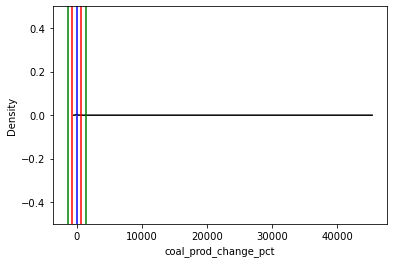

No es distribución normal
****************************************************************************************************
Columna: coal_prod_change_twh	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 8.79810169328462
std: 135.49717960827894


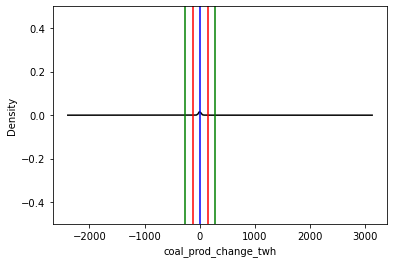

No es distribución normal
****************************************************************************************************
Columna: gas_prod_change_pct	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 192162278897595.22
std: 1.3397721660665936e+16


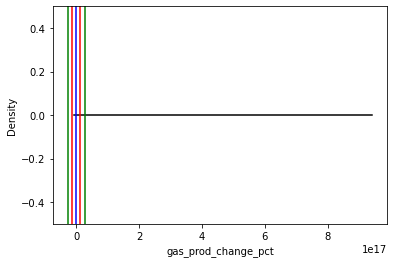

No es distribución normal
****************************************************************************************************
Columna: gas_prod_change_twh	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 14.369018370708174
std: 85.41023765241178


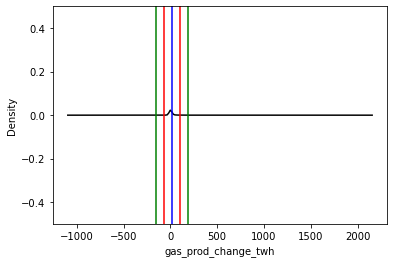

No es distribución normal
****************************************************************************************************
Columna: oil_prod_change_pct	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 18.242190308234928
std: 335.46694953113615


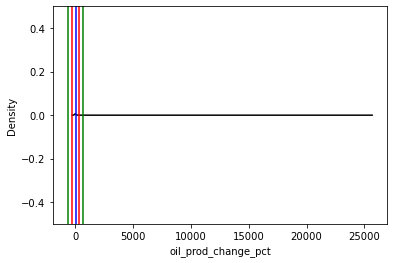

No es distribución normal
****************************************************************************************************
Columna: oil_prod_change_twh	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 18.033792294220692
std: 169.6006854307938


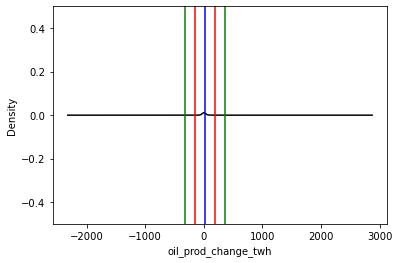

No es distribución normal
****************************************************************************************************
Columna: energy_cons_change_pct	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: inf
std: nan


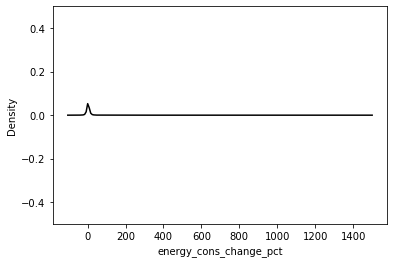

No es distribución normal
****************************************************************************************************
Columna: energy_cons_change_twh	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 36.85324666397096
std: 267.41229362821946


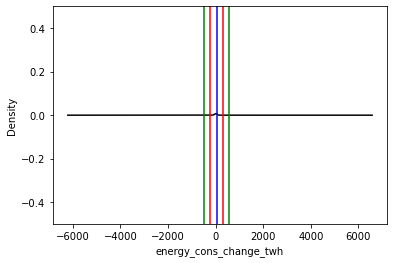

No es distribución normal
****************************************************************************************************
Columna: biofuel_cons_change_twh	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 0.5036068251951353
std: 4.855932295548863


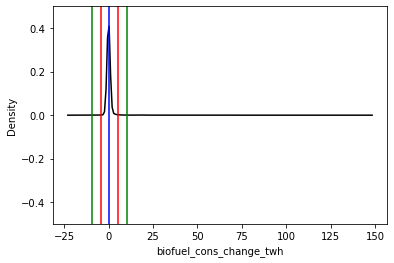

No es distribución normal
****************************************************************************************************
Columna: biofuel_consumption	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 5.831022396018485
std: 48.93021924460831


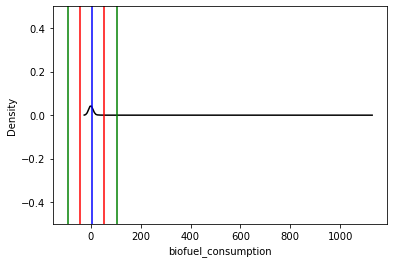

No es distribución normal
****************************************************************************************************
Columna: biofuel_cons_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 25.845832385353702
std: 127.70517498405442


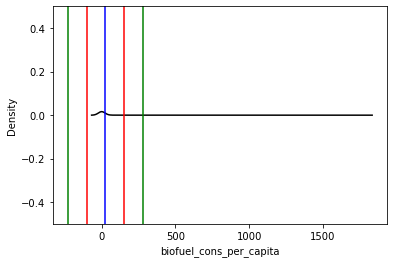

No es distribución normal
****************************************************************************************************
Columna: coal_share_elec	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 17.616326147151884
std: 40.27985337110346


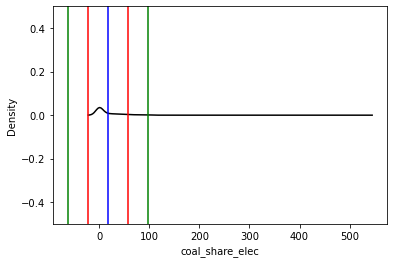

No es distribución normal
****************************************************************************************************
Columna: coal_consumption	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 894.6231988394593
std: 3799.9945581572615


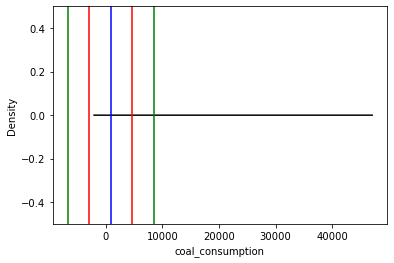

No es distribución normal
****************************************************************************************************
Columna: coal_elec_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 628.5443315822653
std: 1353.4508594953418


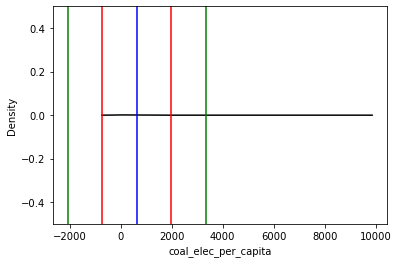

No es distribución normal
****************************************************************************************************
Columna: coal_production	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 471.2054984476427
std: 2611.281227802688


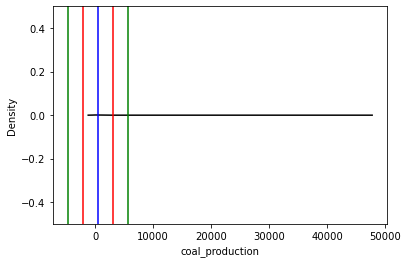

No es distribución normal
****************************************************************************************************
Columna: coal_prod_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 3445.1487310680495
std: 9891.286651500015


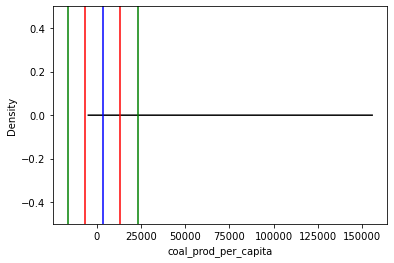

No es distribución normal
****************************************************************************************************
Columna: electricity_generation	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 303.01614708285706
std: 1565.2611036849169


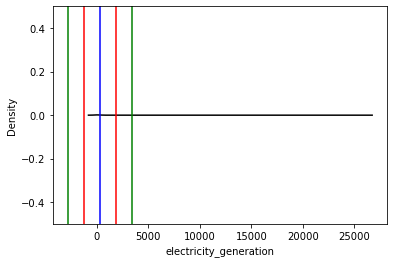

No es distribución normal
****************************************************************************************************
Columna: coal_electricity	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 139.9863959599919
std: 718.2980004495237


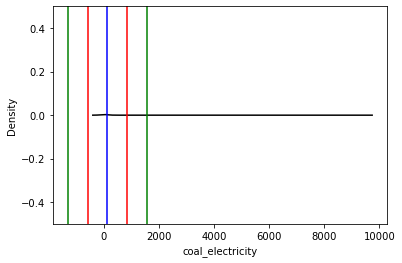

No es distribución normal
****************************************************************************************************
Columna: fossil_electricity	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 238.03508256520857
std: 1128.757499918075


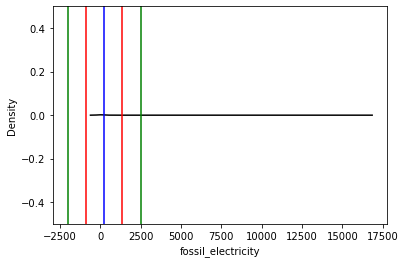

No es distribución normal
****************************************************************************************************
Columna: gas_electricity	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 72.73165208864486
std: 344.02548813432844


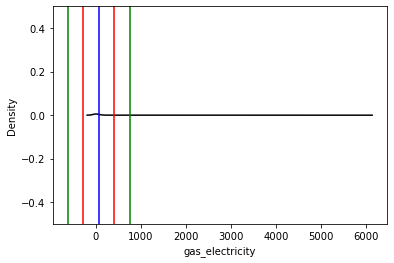

No es distribución normal
****************************************************************************************************
Columna: hydro_electricity	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 51.91696224873352
std: 259.1199020185535


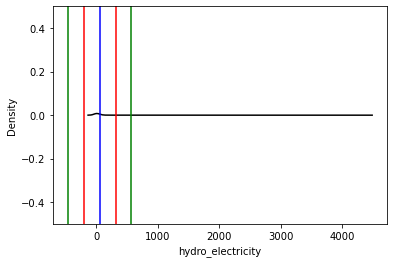

No es distribución normal
****************************************************************************************************
Columna: nuclear_electricity	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 41.82844288282404
std: 218.84219735333528


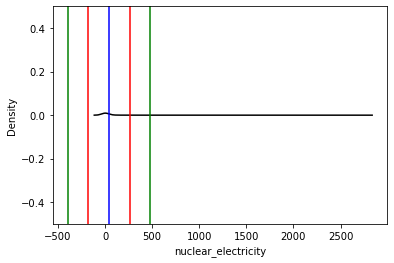

No es distribución normal
****************************************************************************************************
Columna: oil_electricity	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 25.31704255736419
std: 110.61300430299606


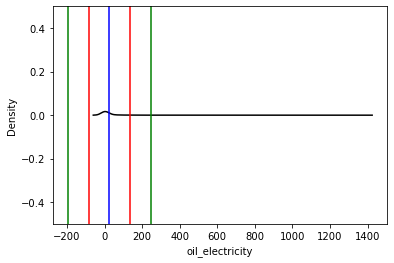

No es distribución normal
****************************************************************************************************
Columna: other_renewable_electricity	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 5.158606344510193
std: 30.99546043268713


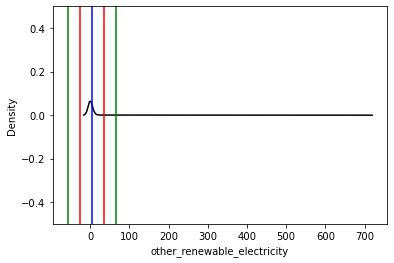

No es distribución normal
****************************************************************************************************
Columna: renewables_electricity	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 64.3313142669297
std: 340.46303357273234


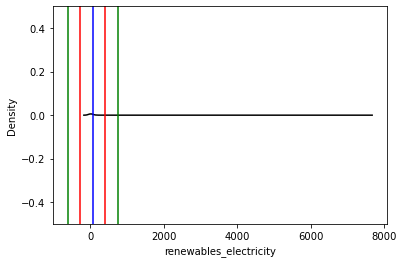

No es distribución normal
****************************************************************************************************
Columna: solar_electricity	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 1.7013703219480425
std: 21.09832840739638


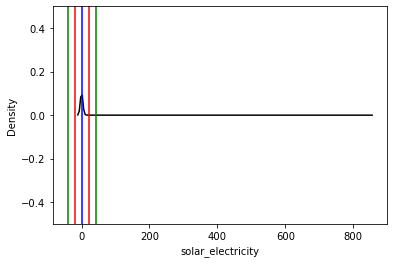

No es distribución normal
****************************************************************************************************
Columna: wind_electricity	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 5.217070272920437
std: 48.96275101806246


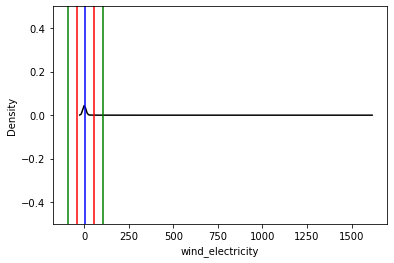

No es distribución normal
****************************************************************************************************
Columna: energy_per_gdp	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 1.8382328985507281
std: 1.570854005279675


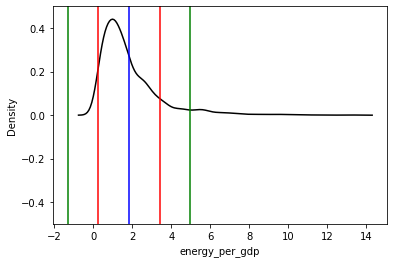

No es distribución normal
****************************************************************************************************
Columna: energy_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 29602.52645024903
std: 75222.10707146538


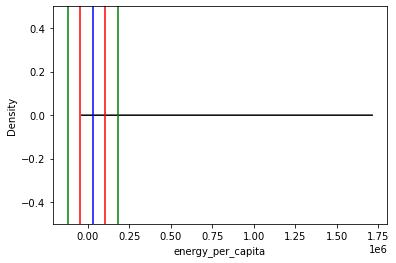

No es distribución normal
****************************************************************************************************
Columna: fossil_cons_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 2419.2597575120844
std: 3110.6587730239107


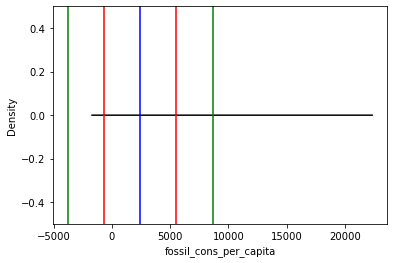

No es distribución normal
****************************************************************************************************
Columna: fossil_share_elec	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 75.69789636075942
std: 68.25100126279534


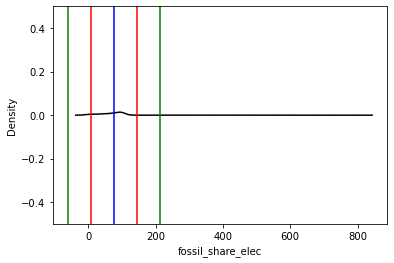

No es distribución normal
****************************************************************************************************
Columna: gas_share_elec	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 23.62553995253156
std: 38.02041584387275


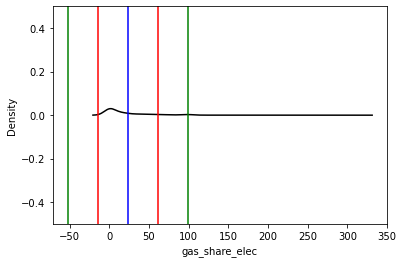

No es distribución normal
****************************************************************************************************
Columna: gas_consumption	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 665.597784332688
std: 2606.3105521387506


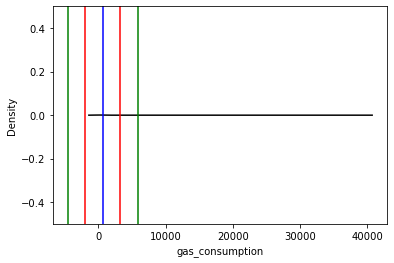

No es distribución normal
****************************************************************************************************
Columna: gas_elec_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 907.3967163269593
std: 2373.733361797275


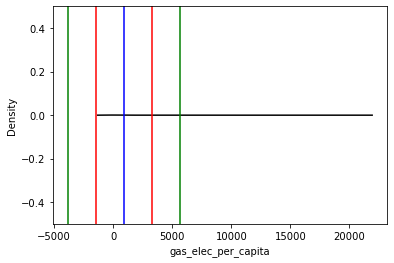

No es distribución normal
****************************************************************************************************
Columna: gas_production	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 457.55510686833543
std: 2144.5792882312717


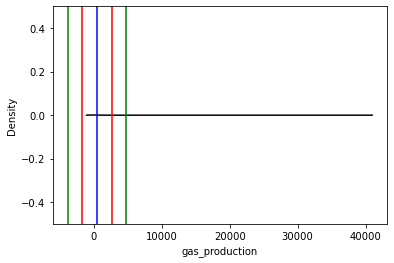

No es distribución normal
****************************************************************************************************
Columna: gas_prod_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 11183.48426975477
std: 48613.68943984522


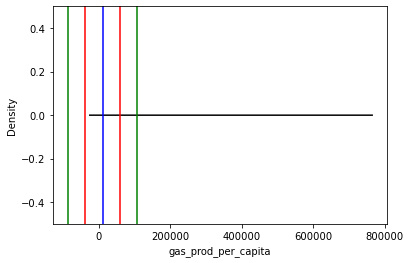

No es distribución normal
****************************************************************************************************
Columna: hydro_share_elec	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 26.510166063199467
std: 31.1099694237872


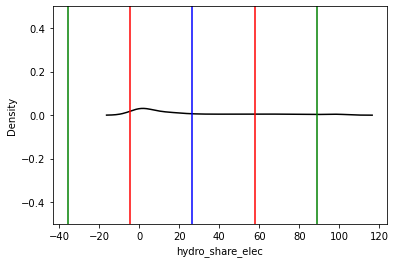

No es distribución normal
****************************************************************************************************
Columna: hydro_elec_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 990.1318143298812
std: 3371.036493190695


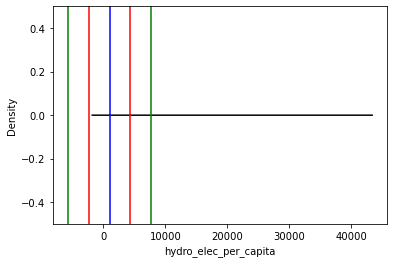

No es distribución normal
****************************************************************************************************
Columna: low_carbon_share_elec	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 35.23589670584333
std: 32.894121961573255


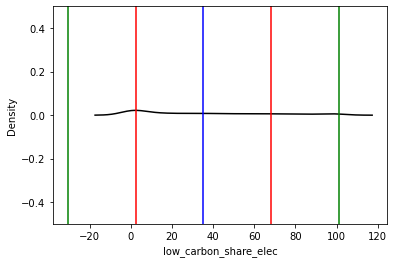

No es distribución normal
****************************************************************************************************
Columna: low_carbon_electricity	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 106.40038790269556
std: 542.2452607301436


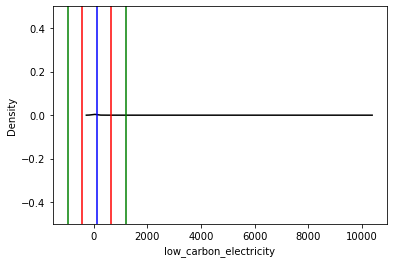

No es distribución normal
****************************************************************************************************
Columna: low_carbon_elec_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 1571.5146777595905
std: 4239.616776450956


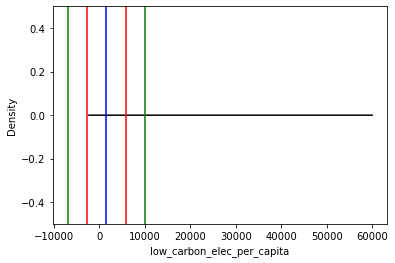

No es distribución normal
****************************************************************************************************
Columna: nuclear_share_elec	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 5.148773864384457
std: 13.217740982530492


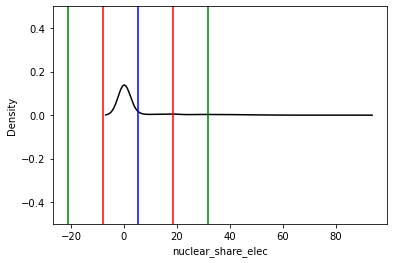

No es distribución normal
****************************************************************************************************
Columna: nuclear_elec_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 398.26316603018756
std: 1121.8289816930287


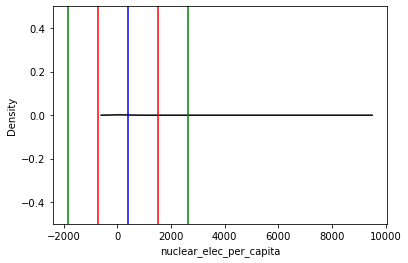

No es distribución normal
****************************************************************************************************
Columna: oil_share_elec	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 34.456027492088594
std: 40.386120479393085


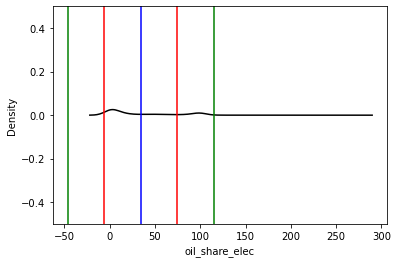

No es distribución normal
****************************************************************************************************
Columna: oil_consumption	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 1238.0163479938283
std: 4534.199444664022


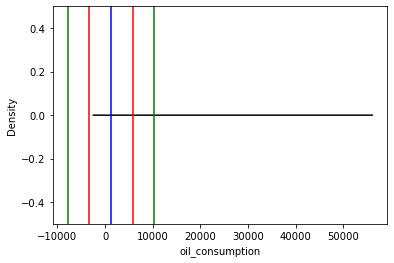

No es distribución normal
****************************************************************************************************
Columna: oil_elec_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 883.3187064509356
std: 1850.0750919323307


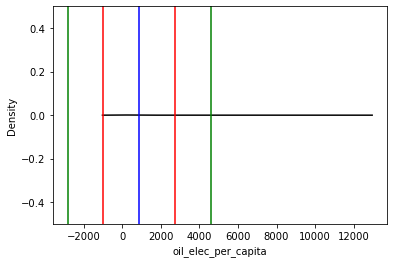

No es distribución normal
****************************************************************************************************
Columna: oil_production	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 875.0055588978184
std: 3622.0683268939465


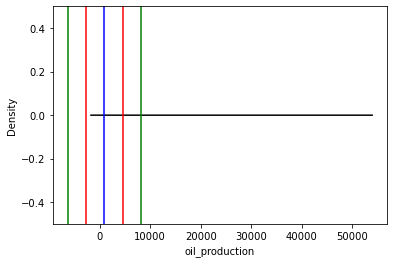

No es distribución normal
****************************************************************************************************
Columna: oil_prod_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 46181.32595381105
std: 229612.2234430219


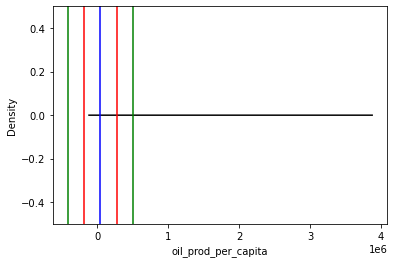

No es distribución normal
****************************************************************************************************
Columna: other_renewables_elec_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 114.71735460992916
std: 781.4553149744479


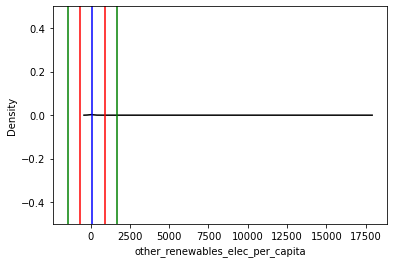

No es distribución normal
****************************************************************************************************
Columna: other_renewables_share_elec	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 1.9803292501241458
std: 4.726123389105113


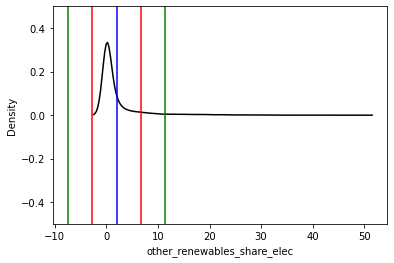

No es distribución normal
****************************************************************************************************
Columna: per_capita_electricity	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 4016.783635933797
std: 5078.300571222247


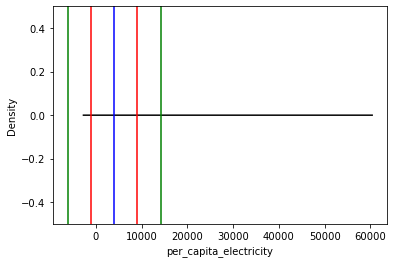

No es distribución normal
****************************************************************************************************
Columna: population	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 62862803.08988262
std: 379377848.3517853


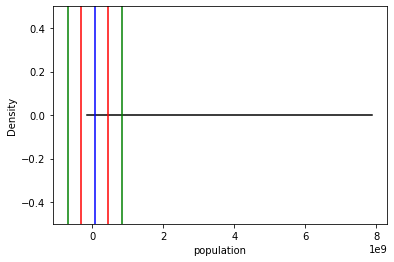

No es distribución normal
****************************************************************************************************
Columna: primary_energy_consumption	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 1672.2461857114647
std: 8826.633616568284


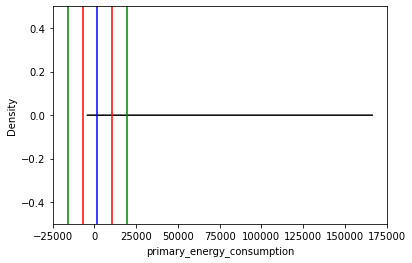

No es distribución normal
****************************************************************************************************
Columna: renewables_elec_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 1173.2515128205082
std: 3932.5116842902726


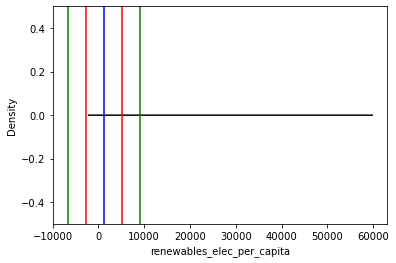

No es distribución normal
****************************************************************************************************
Columna: renewables_share_elec	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 30.057288528389307
std: 31.981755056287703


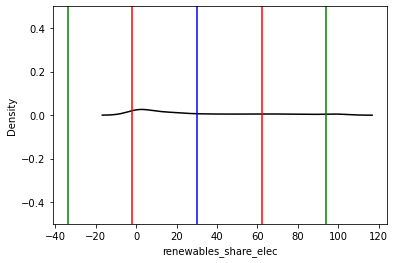

No es distribución normal
****************************************************************************************************
Columna: solar_share_elec	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 0.4021288676761025
std: 1.4581159837961222


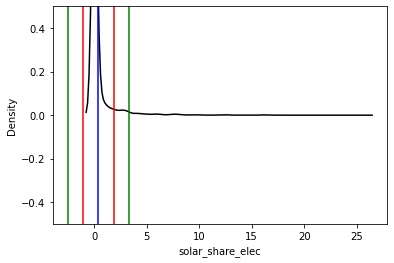

No es distribución normal
****************************************************************************************************
Columna: solar_elec_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 14.776571194762694
std: 58.7450900871852


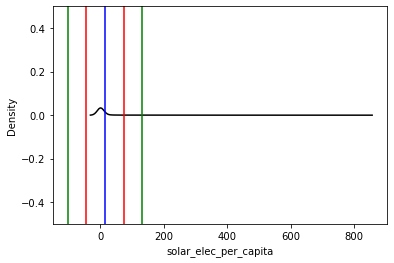

No es distribución normal
****************************************************************************************************
Columna: gdp	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 541783311486.1255
std: 4083646685805.0547


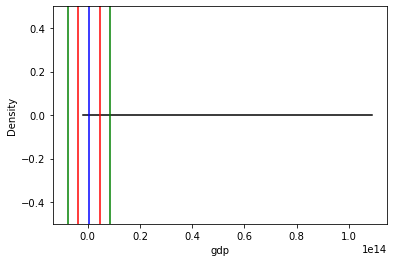

No es distribución normal
****************************************************************************************************
Columna: wind_share_elec	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 1.006011191573409
std: 3.680247268336233


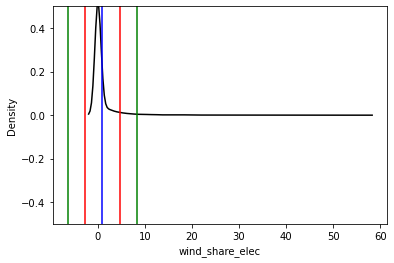

No es distribución normal
****************************************************************************************************
Columna: wind_elec_per_capita	 Kurtosis: nan	 Skewness: nan
Kurtosis es negativa
Skewness es negativa
Media: 53.62578250591037
std: 209.52443563102966


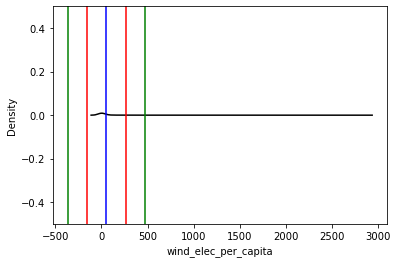

No es distribución normal
****************************************************************************************************


In [85]:
estadistica_2("World Energy Consumption.csv")

In [81]:
df = pd.read_csv("World Energy Consumption.csv")

In [83]:
df["wind_energy_per_capita"].isnull().sum()/df.shape[0]

0.7539008719596145

Columna: Largo Sepalo	 Kurtosis: -0.5735679489249765	 Skewness: 0.3117530585022963
Kurtosis es negativa
Skewness es positiva
Media: 5.843333333333335
std: 0.8253012917851409


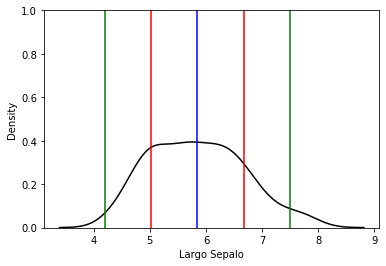

No es distribución normal
****************************************************************************************************
Columna: Ancho Sepalo	 Kurtosis: 0.24144329938318343	 Skewness: 0.330702812773315
Kurtosis es positiva
Skewness es positiva
Media: 3.0540000000000007
std: 0.4321465800705435


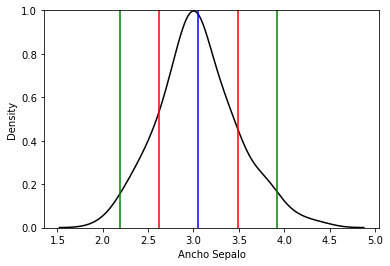

Es distribución normal
No cumple la condición del 68
No cumple la condición del 95
Cumple la condición del 99.7
****************************************************************************************************
Columna: Largo Petalo	 Kurtosis: -1.3953593021397128	 Skewness: -0.2717119501716388
Kurtosis es negativa
Skewness es negativa
Media: 3.7586666666666693
std: 1.7585291834055201


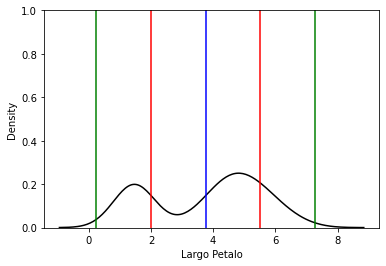

No es distribución normal
****************************************************************************************************
Columna: Ancho Petalo	 Kurtosis: -1.3352456441311857	 Skewness: -0.10394366626751729
Kurtosis es negativa
Skewness es negativa
Media: 1.1986666666666672
std: 0.760612618588172


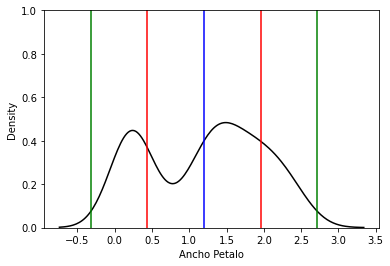

No es distribución normal
****************************************************************************************************


In [94]:
estadistica_2("iris.csv")